In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
df = pd.read_csv("TextAnalysisData/sentimentData.csv")
df

,Text,Author,Positive,Negative,Neutral
0,jew_of_malta.txt,Marlowe,0.120,0.090,0.790
1,massacre_at_paris.txt,Marlowe,0.121,0.080,0.798
2,tamburlaine.txt,Marlowe,0.141,0.091,0.768
3,faustus.txt,Marlowe,0.119,0.089,0.792
4,dido_queen_of_carthage.txt,Marlowe,0.087,0.062,0.851
5,edward_II.txt,Marlowe,0.133,0.112,0.755
6,hero_and_leander.txt,Marlowe,0.190,0.100,0.710
7,henry_vi_3.txt,Shakespeare,0.122,0.084,0.794
8,love_labours_lost.txt,Shakespeare,0.179,0.093,0.729
9,henry_vi_2.txt,Shakespeare,0.114,0.089,0.797


In [15]:
counts = pd.read_csv("TextAnalysisData/rawCounts.csv")
counts.head()

,Text,Author,Word,Count,TFIDF
0,jew_of_malta.txt,Marlowe,﻿The,1,0.166667
1,jew_of_malta.txt,Marlowe,Project,83,11.857143
2,jew_of_malta.txt,Marlowe,Gutenberg,27,3.857143
3,jew_of_malta.txt,Marlowe,EBook,3,0.500000
4,jew_of_malta.txt,Marlowe,of,568,81.142857


## Problem 5

Shakespeare and Marlowe have a similar range of positive sentiment from 0.090 to 0.190. However, Shakespeare has a larger distribution of sentiment within that range whereas most of Marlowe's sentiment falls between a small range of 0.120 to 0.140. This tells me that the style of the two writers is very similar in terms of how they use positive sentiment.

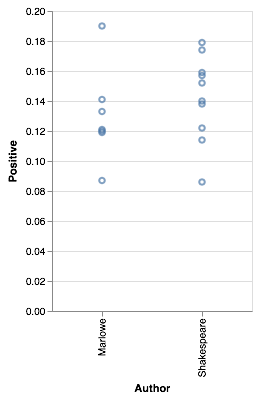

In [12]:
alt.Chart(df, width = 200).mark_point().encode(
    x = "Author",
    y = "Positive"
)

## Problem 6

To compare the style of each author I compared both the overall word count and then aggregated the count of each word. When exploring the overall word count Marlowe is significantly more wordy than Shakespeare and used more words. When comparing the aggregated count of each word, Shakespeare had a slightly higher count which means that he uses the same words more often than Marlowe. This being said, Marlowe uses a wider range of vocabulary but repeats the words less often, whereas Shakespeare uses less words more often. 

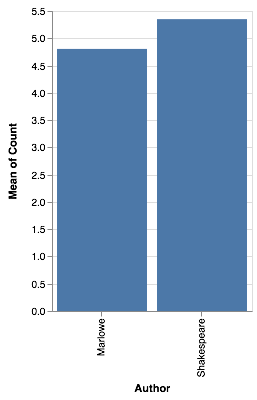

In [31]:
alt.data_transformers.enable('csv')

alt.Chart(counts, width = 200).mark_bar().encode(
    x = "Author",
#    y = "Count"
    y = alt.Y(field='Count', aggregate='mean', type='quantitative')
)

## Problem 7

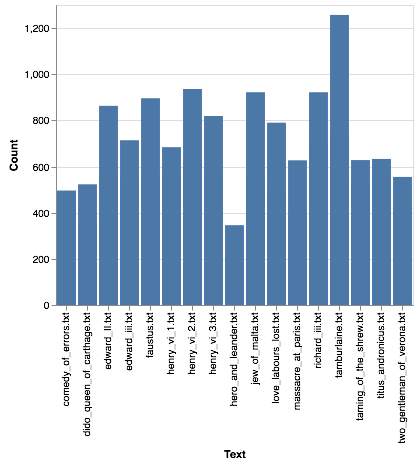

In [44]:
# Looking at the average word count for each text and also looking at the chart for problem 6 it is incredibly
# difficult to tell who wrote each text because the overall word counts and average count of each word is so 
# similar. The word count across all text is pretty similar with only a few outliers occurring with "Hero and Leander"
# and "Tamburlaine". These findings would support the argument that they did collaborate because their text follows
# similar word trends. 

alt.Chart(counts).mark_bar().encode(
    x = 'Text',
    y = 'Count'
#    y = 'average(Count)'
)

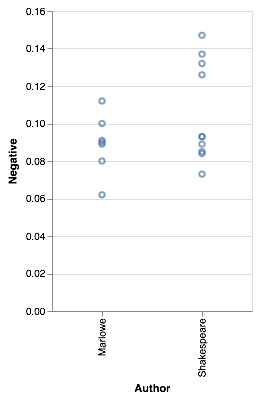

In [38]:
# The negative sentiment pattern is interesting to look at because there is actually a difference between the authors
# where everything else seems to be very similar. Marlowe has less variation of negative sentiment between his texts
# and is generally more negative than Shakespeare. Shakespeare has a larger variation of negative sentiment with some
# of his text being significantly more negative than the others. 

alt.Chart(df, width = 200).mark_point().encode(
    x = "Author",
    y = "Negative"
)

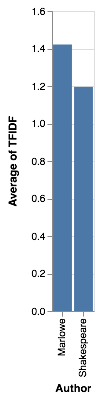

In [46]:
# This visual is interesting because it supports the findings I had in problem 6. This visual shows that Marlowe 
# has a higher TFIDF than Shakespeare. This means that Marlowe uses more words less often than Shakespeare. This
# results in a high TFIDF because the word is more unique in the documents and is weighted more than words that are 
# repeated often.

alt.Chart(counts).mark_bar().encode(
    x = 'Author',
    y = 'average(TFIDF)'
)